In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

bike_df = pd.read_csv('./data/bike_train.csv')

In [124]:
# shape 확인
bike_df.shape

(10886, 12)

In [125]:
# null값 확인
bike_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [126]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [127]:
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# 데이터 전처리

In [128]:
# datetime -> 년,월,일,시간으로 분리하기
bike_df['datetime'] = bike_df['datetime'].apply(pd.to_datetime)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [129]:
bike_df['year'] = bike_df['datetime'].apply(lambda x : x.year)
bike_df['month'] = bike_df['datetime'].apply(lambda x : x.month)
bike_df['day'] = bike_df['datetime'].apply(lambda x : x.day)
bike_df['hour'] = bike_df['datetime'].apply(lambda x : x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


- 필요없는 column drop

In [130]:
drop_col = ['datetime','casual','registered']
bike_df.drop(drop_col, axis=1, inplace=True)

In [131]:
bike_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


In [132]:
bike_df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'year', 'month', 'day', 'hour'],
      dtype='object')

# 자전거 대여 수(count)의 분포 시각화

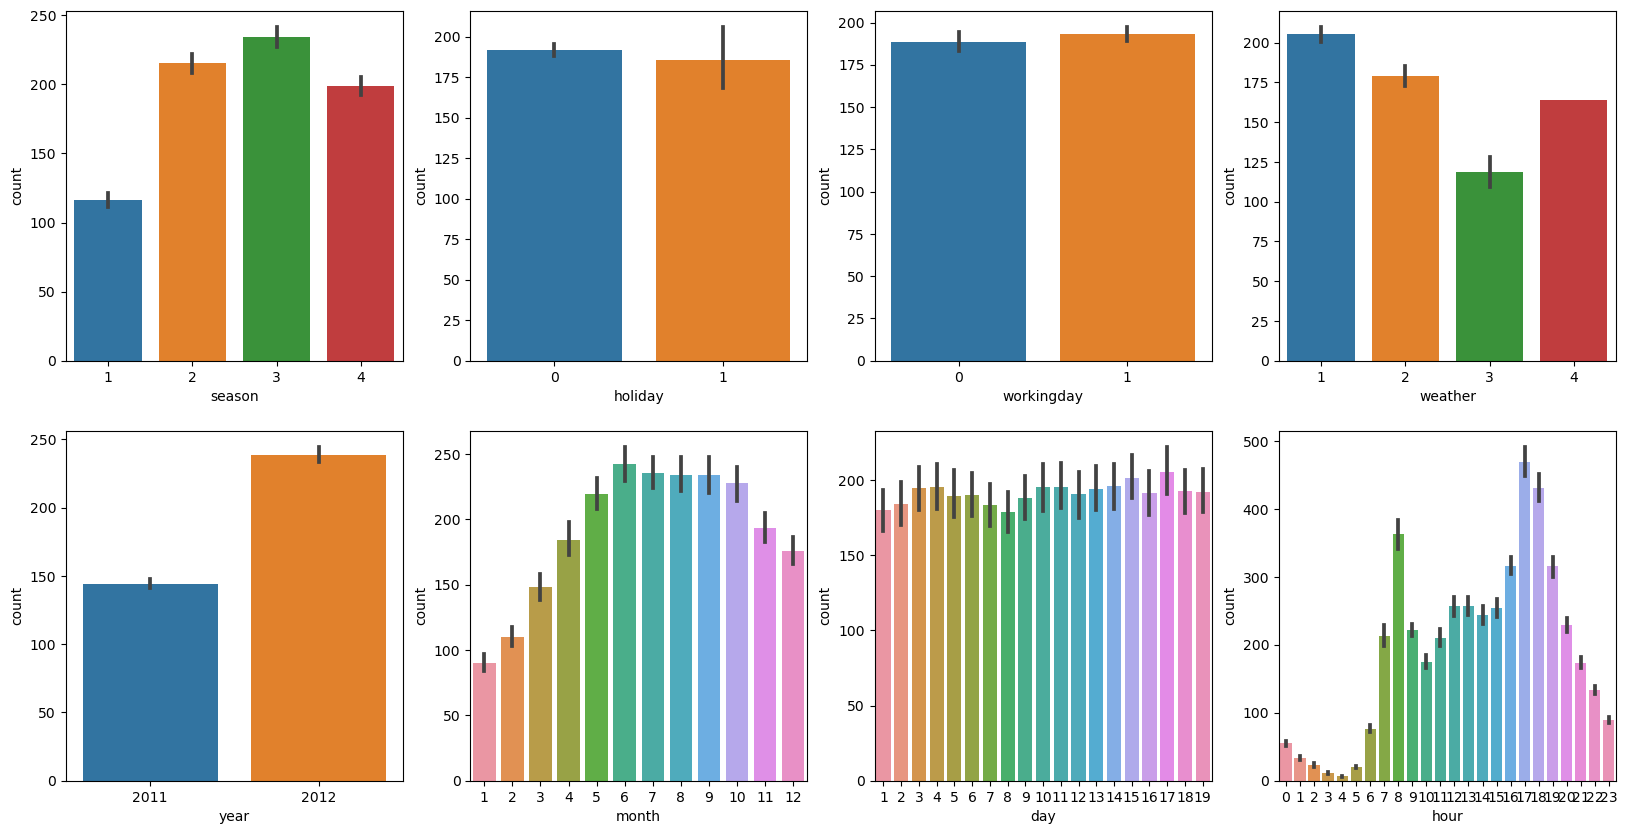

In [133]:
# 자전거 대여 수(count)와 feature 간의 관계
fig, axs = plt.subplots(figsize=(20,10), ncols=4, nrows=2)
feature = ['season', 'holiday', 'workingday', 'weather','year', 'month', 'day', 'hour']
for i, j in enumerate(feature):
    row = int(i/4)
    col = i%4
    sns.barplot(ax= axs[row][col],x = bike_df[j], y = bike_df['count'])

<대여 수>
- season: 여름(2), 가을(3) 높음
- holiday, workingday: 주중, 휴일여부는 차이 없음
- weather: 맑은(1), 안개(2)가 높음
- year: 2011 < 2012
- month: 6~10월달에 높음
- hour: 8~9, 17~18시(출,퇴근시간)가 높음.

# 회귀

## 함수생성

- 평가 함수 생성

In [134]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# root mean squared log error 함수
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y, pred):
    return np.sqrt(mean_squared_error(y,pred))

def evaluate_regr(y, pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    mae_val = mean_absolute_error(y, pred)
    print(f'RMSLE: {round(rmsle_val,3)}, RMSE: {round(rmse_val,3)}, MAE: {round(mae_val,3)}')

- 모델 학습 함수 생성

In [135]:
def get_predict(model, X_train, X_test, y_train):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return pred

## 회귀 예측: 선형회귀

In [136]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'],axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
pred =get_predict(lr_reg, X_train, X_test, y_train) 
evaluate_regr(y_test, pred)

RMSLE: 1.165, RMSE: 140.9, MAE: 105.924


- 대여 횟수가 105~140회정도 차이(오류)가 난다? 너무 큰 숫자.
- 회귀에서 이러한 큰 오류가 발생할 경우, 가장 먼저 살펴봐야 하는 것은 `Target 의 분포가 왜곡된 형태를 이루고 있는지`!

<AxesSubplot:>

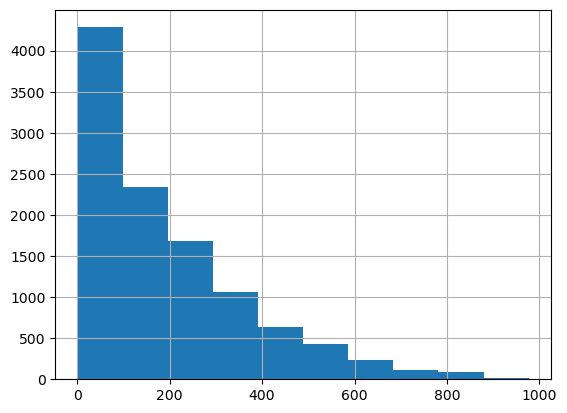

In [137]:
y_target.hist()

- 역시나 0~200사이에 값이 쏠려있다.
- 왜곡된 값을 정규분포로 바꾸기 위해 `로그 변환` 을 취하겠다.

### 로그변환

<AxesSubplot:>

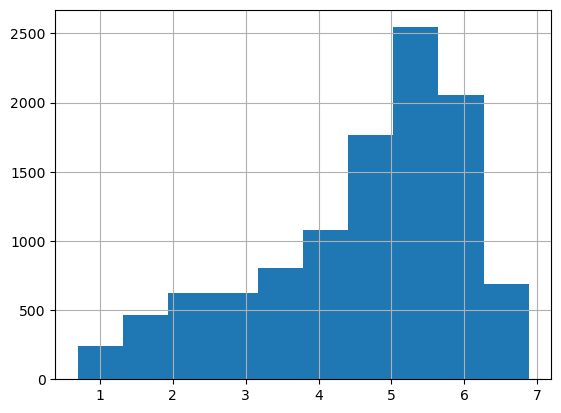

In [138]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

- 로그변환을 하니 완벽한 정규분포는 아니지만, 이전보다는 왜곡이 많이 개선되었다.

### y_target을 로그변환 후 회귀 진행

In [139]:
# y_target값을 log변환한 값으로 대체
y_target = y_log_transform
X_features = bike_df.drop(['count'],axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
pred =get_predict(lr_reg, X_train, X_test, y_train) 

# 로그 변환된 상태인 y_test와 pred 모두 원상복구
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

# 평가
evaluate_regr(y_test_exp, pred_exp)

RMSLE: 1.017, RMSE: 162.594, MAE: 109.286


RMSLE줄었지만... RMSE, MAE 오히려 늘어남.  

### 회귀계수 확인

<AxesSubplot:>

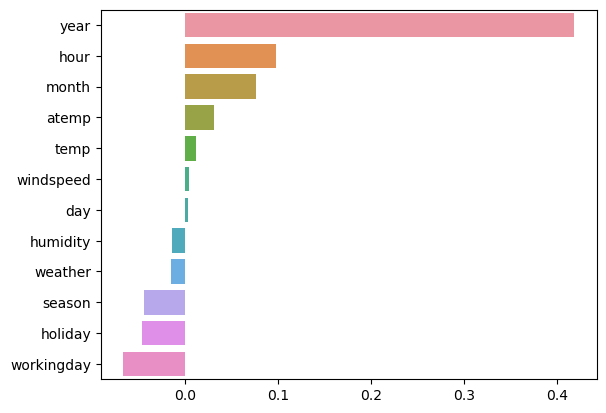

In [140]:
coef = pd.Series(lr_reg.coef_, index= X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y= coef_sort.index)


- year, hour, month, workingday, holiday, season 피처들의 회귀계수가 상대적으로 높음
- year -> 2011,2012 , month -> 1,2,3,4,...와 같이 숫자값의 형태로 의미를 담고 있음.
- 그러나 이들의 경우 개별 숫자값의 크기가 의미가 있지는 않다. 1월, 2월, 등 구분의 의미이지 1 -> 2 -> 3 -> 4.. 식으로 점점 커지는 것을 의미하는 것은 아니ㅏㄷ.
- 따라서 year, hour, month는 숫자로 표현되었지만 카테고리형 피처이다.
- 그러므로 이들은 `원-핫 인코딩`을 적용해야 함.

## 원핫인코딩

In [149]:
cat_col = ['year','hour','month','day','workingday','holiday','season','weather']
X_features_ohe = pd.get_dummies(X_features,columns = cat_col)
X_features_ohe.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'year_2011', 'year_2012',
       'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'day_1',
       'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9',
       'day_10', 'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16',
       'day_17', 'day_18', 'day_19', 'workingday_0', 'workingday_1',
       'holiday_0', 'holiday_1', 'season_1', 'season_2', 'season_3',
       'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4'],
      dtype='object')

In [150]:
X_features_ohe

,temp,atemp,humidity,windspeed,year_2011,year_2012,hour_0,hour_1,hour_2,hour_3,...,holiday_0,holiday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
1,9.02,13.635,80,0.0000,1,0,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
2,9.02,13.635,80,0.0000,1,0,0,0,1,0,...,1,0,1,0,0,0,1,0,0,0
3,9.84,14.395,75,0.0000,1,0,0,0,0,1,...,1,0,1,0,0,0,1,0,0,0
4,9.84,14.395,75,0.0000,1,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
10882,14.76,17.425,57,15.0013,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
10883,13.94,15.910,61,15.0013,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
10884,13.94,17.425,61,6.0032,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0


# 평가

In [163]:
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1 =False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('-----',model.__class__.__name__,'-----')
    evaluate_regr(y_test, pred)
    return pred

In [164]:
from sklearn.linear_model import Ridge, Lasso

y_target = y_log_transform
X_features = bike_df.drop(['count'],axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_log_transform, test_size=0.3, random_state=0)


lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, True)

----- LinearRegression -----
RMSLE: 0.59, RMSE: 97.688, MAE: 63.382
----- Ridge -----
RMSLE: 0.59, RMSE: 98.529, MAE: 63.893
----- Lasso -----
RMSLE: 0.635, RMSE: 113.219, MAE: 72.803


In [165]:
X_features_ohe

,temp,atemp,humidity,windspeed,year_2011,year_2012,hour_0,hour_1,hour_2,hour_3,...,holiday_0,holiday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
1,9.02,13.635,80,0.0000,1,0,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
2,9.02,13.635,80,0.0000,1,0,0,0,1,0,...,1,0,1,0,0,0,1,0,0,0
3,9.84,14.395,75,0.0000,1,0,0,0,0,1,...,1,0,1,0,0,0,1,0,0,0
4,9.84,14.395,75,0.0000,1,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
10882,14.76,17.425,57,15.0013,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
10883,13.94,15.910,61,15.0013,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
10884,13.94,17.425,61,6.0032,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0


<AxesSubplot:>

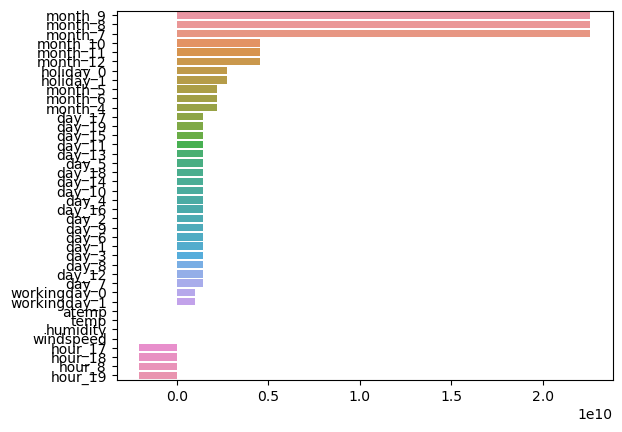

In [166]:
coef = pd.Series(lr_reg.coef_, index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:40]
sns.barplot(x=coef_sort.values, y = coef_sort.index)

- 선형회귀의 경우, 중요 카테고리성 피처들을 원-핫 인코딩으로 변환하는 것은 성능에 중요한 영향을 미칠 수 있다.